In [15]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-white')

import matplotlib.cm as cm

import numpy as np

In [17]:
csv = 'csv'
log = 'log'
all_filenames = [i for i in glob.glob('*.{}'.format(csv))]
all_logs = [i for i in glob.glob('*.{}'.format(log))]
print(all_filenames,all_logs)

['Grabow_Results_RMG10.csv', 'Grabow_Results_RMG11.csv', 'Grabow_Results_RMG18.csv', 'Grabow_Results_RMG27.csv', 'Grabow_Results_RMG9.csv'] []


In [18]:
# combine all files in the list
# if len(all_filenames) > 1:

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
# export to csv




In [4]:
if len(all_filenames) > 2:
    # Remove logs and other csv's
    for i in all_filenames: 
        if not (i in 'combined_csv.csv'): 
            os.remove(i)
if len(all_logs) > 0:
    for i in all_logs: 
        os.remove(i)


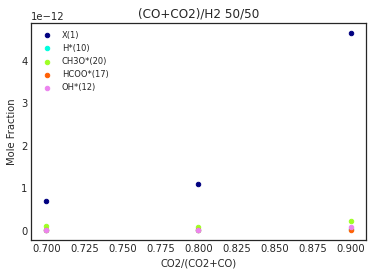

In [19]:
df = pd.read_csv('combined_csv.csv')
df_short_50 = df[(df['X_h2 initial'] >= 0.49) &(df['X_h2 initial'] <= 0.51)]
df_short_75 = df[(df['X_h2 initial'] >= 0.74) &(df['X_h2 initial'] <= 0.76)]
df_short_80 = df[(df['X_h2 initial'] >= 0.79) &(df['X_h2 initial'] <= 0.81)]
df_short_95 = df[(df['X_h2 initial'] >= 0.94) &(df['X_h2 initial'] <= 0.96)]

conditions = ['X(1)', 'H*(10)', 'CH3O*(20)', 'HCOO*(17)', 'OH*(12)']

fig, ax = plt.subplots()
for i in conditions:
    df_short_50.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 50/50")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')


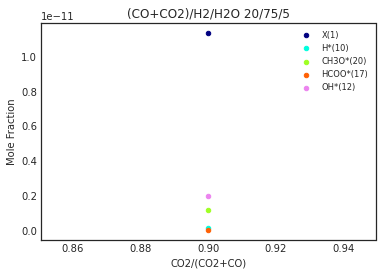

In [20]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_75.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2/H2O 20/75/5")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

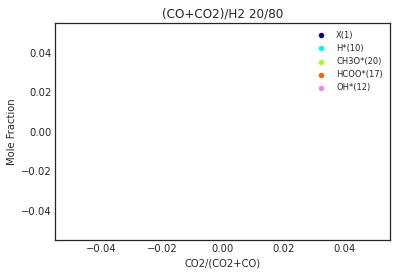

In [21]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_80.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 20/80")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

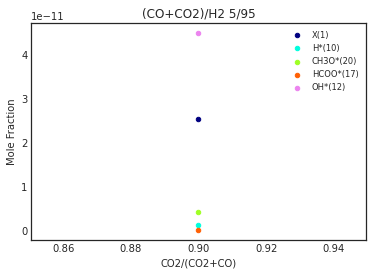

In [22]:
fig, ax = plt.subplots()
for i in conditions:
    df_short_95.plot.scatter(x='CO2/(CO2+CO)', y=i, ax=ax, label=i)
ax.set_title("(CO+CO2)/H2 5/95")
ax.set_ylabel("Mole Fraction")

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small')

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

max_dist = 2
imp_reactions = []
imprxn_max = []
imprxn_min = []

df_short = df_short_95

print('\n Reactions with ROP that spikes between 1.5 and 1.8:', '\n')
for i in range (6, len(df_short.columns)):
    
    column = df_short[df_short.columns[i]]
    dist = df_short[df_short.columns[0]]
    max_value = column.max()
    max_index = column.idxmax()
    min_value = column.min()
    min_index = column.idxmin()
    

# 1.5 <= dist[min_index] <= 1.74 and 
    if max_value >= 1e-4 and (("X" in df_short.columns[i]) or ("Pt" in df_short.columns[i]) or ("Pd" in df_short.columns[i]) or ("*" in df_short.columns[i])):
            
        imp_reactions.append(df_short.columns[i])
        imprxn_max.append(max_value)
        imprxn_min.append(min_value)
        print(df_short.columns[i], "Max = " "{:.10f}".format(max_value))
        
    elif min_value <= -1e-4 and (("X" in df_short.columns[i]) or ("Pt" in df_short.columns[i]) or ("Pd" in df_short.columns[i]) or ("*" in df_short.columns[i])):
        
        imp_reactions.append(df_short.columns[i])
        print(df_short.columns[i], "Min = " "{:.10f}".format(min_value))
        imprxn_max.append(max_value)
        imprxn_min.append(min_value)

        

# # reactions
# for i in range(len(imp_reactions)):
#     Ymin = imprxn_min[i] - abs(imprxn_min[i])
#     Ymax = imprxn_max[i] + abs(imprxn_max[i])
#     ax = df_short.plot(x='Distance (mm)', y=imp_reactions[i], xlim=(0,2.0), legend = False, title=imp_reactions[i])
#     ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))


 Reactions with ROP that spikes between 1.5 and 1.8: 

C2HOX(465) Max = 0.9999798791


In [24]:
import math
import cantera as ct
# Grabow model and RMG input files
# cti_file_rmg = '../base/cantera/chem_annotated.cti'


cti_file_rmg = 'chem_annotated_removed.cti'



#constants
pi = math.pi

# set initial temps, pressures, concentrations
# temp = 230+273.15 # kelvin
temp = 528 # kelvin
pressure = 50*ct.one_atm # Pascals
X_co = 0.1
X_co2= 0.1
X_h2 = 0.8
mw_co = 28.01e-3  # [kg/mol]
mw_co2 = 44.01e-3 # [kg/mol]
mw_h2 = 1.01e-3 # [kg/mol]

# CO/CO2/H2/H2O: typical is 
concentrations_rmg = {'CO(3)': X_co,'CO2(4)': X_co2, 'H2(2)':X_h2}

# initialize cantera gas and surface
gas= ct.Solution(cti_file_rmg,'gas')

# surf_grab = ct.Interface(cti_file,'surface1_grab', [gas_grab])
surf = ct.Interface(cti_file_rmg,'surface1', [gas])

# gas_grab.TPX = 
gas.TPX = temp, pressure, concentrations_rmg
surf.TP = temp, pressure
surf.coverages = 'X(1):1.0'

In [27]:
for i in range(0, surf.n_reactions):
     if 'CH3OH(8)' in str(surf.reaction_equation(i)):
         print(surf.reaction_equation(i))

CH3OH(8) + 2 X(1) <=> CH3O*(20) + H*(10)
CH3OH(8) + X(1) <=> CH3OH*(22)
CH3OH(8) + 2 X(1) <=> CH3OX(46) + H*(10)
CH3OH(8) + 2 X(1) <=> CH3X(52) + OH*(12)


In [30]:
for i in range(0, surf.n_reactions):
     if 'CH3OX(46)' in str(surf.reaction_equation(i)):
         print(surf.reaction_equation(i), i)

CH3O*(20) <=> CH3OX(46) 84
CH3OH(8) + 2 X(1) <=> CH3OX(46) + H*(10) 85
CH3O2*(21) + X(1) <=> CH3OX(46) + O*(11) 86
CH3OX(46) + H*(10) <=> CH3OH*(22) + X(1) 87
CH2O(6) + H*(10) <=> CH3OX(46) 88
CH2O*(19) + H*(10) <=> CH3OX(46) + X(1) 89
CH3OH*(22) + O*(11) <=> CH3OX(46) + OH*(12) 90
CH2O*(19) + OH*(12) <=> CH3OX(46) + O*(11) 91
CH2O*(19) + H2O*(13) <=> CH3OX(46) + OH*(12) 92
CH3OH*(22) + CO*(14) <=> CH3OX(46) + HCO*(16) 93
CH3OH*(22) + CO2*(15) <=> CH3OX(46) + HCOO*(17) 94
CH3OH*(22) + CO2*(15) <=> CH3OX(46) + COOH*(18) 95
CH2O*(19) + HCO*(16) <=> CH3OX(46) + CO*(14) 96
2 CH2O*(19) <=> CH3OX(46) + HCO*(16) 97
CH2O*(19) + CH3OH*(22) <=> CH3O*(20) + CH3OX(46) 98
CH2O*(19) + CH3OH*(22) <=> CH3O*(20) + CH3OX(46) 99
CH2O*(19) + CH3OH*(22) <=> 2 CH3OX(46) 100
CH2O*(19) + CH2O2X(51) <=> CH3OX(46) + HCOO*(17) 101
CH2O*(19) + CH2O2X(51) <=> CH3OX(46) + COOH*(18) 102
CH2O2X(51) + CH3OH*(22) <=> CH3O2*(21) + CH3OX(46) 103
CH2O*(19) + CH4X(238) <=> CH3OX(46) + CH3X(52) 119
CH2O2X(51) + CH3OH*(22) <